# Проект. Решение продуктовых задач
#  «Анализ данных о транзакциях»

### Проверка на дубликаты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
retail = pd.read_csv('trans_data.zip', encoding='ISO-8859-1', compression='zip')

In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail.InvoiceDate)

In [7]:
retail_dup = retail.loc[retail.duplicated()]

In [8]:
retail_dup.shape

(5268, 8)

In [9]:
retail_ndup = retail.drop_duplicates()

In [10]:
retail_ndup.shape

(536641, 8)

### Проверяем сколько пользователи отменили транзакций

In [11]:
retail_c = retail_ndup.InvoiceNo.str.startswith('C').value_counts()
retail_c

InvoiceNo
False    527390
True       9251
Name: count, dtype: int64

In [12]:
retail_nc = retail_ndup.loc[~retail_ndup.InvoiceNo.str.startswith('C')]
retail_nc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Смотрим пользователей любой из стран, чтобы выявить максимально активных.

In [13]:
invoice_dist = retail.query('Country == "Germany"')\
                .groupby('CustomerID', as_index=False)\
                .agg({'InvoiceNo':'nunique'})\
                .rename(columns={'InvoiceNo':'total_invoices'})
N = invoice_dist.total_invoices.quantile(q=0.8)

In [14]:
germany_top = invoice_dist.loc[invoice_dist.total_invoices > N]['CustomerID']
germany_top

3     12471.0
4     12472.0
6     12474.0
8     12476.0
12    12481.0
16    12500.0
37    12569.0
44    12600.0
52    12619.0
53    12621.0
57    12626.0
65    12647.0
70    12662.0
78    12705.0
79    12708.0
80    12709.0
82    12712.0
84    12720.0
Name: CustomerID, dtype: float64

### Делаем топ пользователй германии

In [15]:
top_retail_germany = retail_nc[retail_nc['CustomerID'].isin(germany_top)]
top_retail_germany.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
1114,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1115,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,2010-12-01 13:04:00,0.42,12662.0,Germany
1116,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1117,536527,20713,JUMBO BAG OWLS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1118,536527,22837,HOT WATER BOTTLE BABUSHKA,4,2010-12-01 13:04:00,4.65,12662.0,Germany


### Проверяем какие товары топ-пользователи добавляли больше всего

In [16]:
no_post_ger = top_retail_germany.StockCode.value_counts()
no_post_ger

StockCode
POST     212
22326     57
22328     41
22423     40
20719     33
        ... 
23543      1
23535      1
22596      1
84819      1
84820      1
Name: count, Length: 1160, dtype: int64

### Ищем самые большие по выручке заказы

In [21]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
retail_rev = retail.assign(Revenue = retail['Quantity'] * retail['UnitPrice'])
retail_rev

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [18]:
sum_rev = retail_rev.groupby('InvoiceNo')['Revenue'].sum() \
                    .reset_index() \
                    .rename(columns={'Revenue': 'TotalRevenue'})

In [19]:
sum_rev

,InvoiceNo,TotalRevenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
25895,C581484,-168469.60
25896,C581490,-32.53
25897,C581499,-224.69
25898,C581568,-54.75


In [20]:
top_5_rev = sum_rev.sort_values(by='TotalRevenue', ascending=False).head(5)

In [21]:
top_5_rev

,InvoiceNo,TotalRevenue
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00


In [22]:
top_5_rev.InvoiceNo

22025    581483
2303     541431
18776    574941
19468    576365
9741     556444
Name: InvoiceNo, dtype: object

## Переключаемся на работу с новым датасетом `transaction_data.csv`.

### Проверяем, есть ли пустые значения в датасете

In [24]:
data = pd.read_csv('transaction_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [25]:
data.shape

(5315, 3)

In [26]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [27]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [28]:
data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


### Смотрим кол-во заказов того или иного статуса

In [29]:
trans = data['transaction'].value_counts()
trans

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

In [30]:
import seaborn as sns

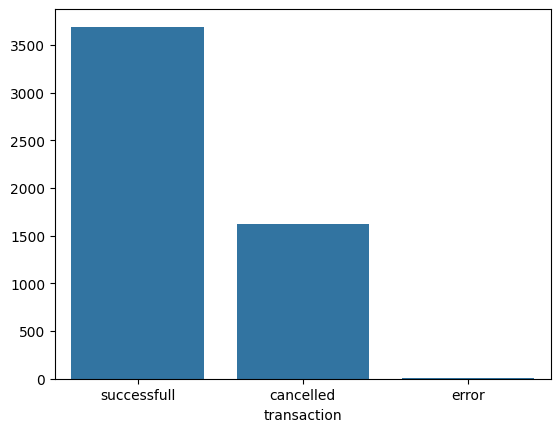

In [31]:
sns.barplot(x=trans.index, y=trans.values)
plt.show()

### Считаем, сколько успешних транзакций совершил каждый пользователь

In [32]:
success = data[data['transaction'] == 'successfull']
success

,date,name,transaction
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
...,...,...,...
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull


In [33]:
success_per_client = success.groupby('name', as_index=False).size()
success_per_client

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


In [34]:
success_per_client.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


### Гистограмма отображающая число транзакций по оси х, и кол-во пользователей с таким числом транзакций по оси у

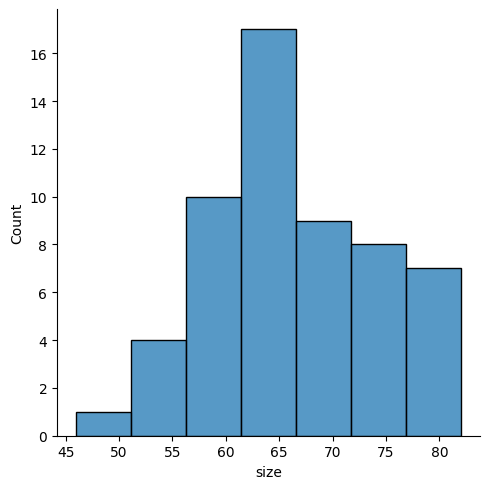

In [35]:
sns.displot(data=success_per_client, x='size')
plt.show()

### Строим сводную таблицу чтобы проверить небыло ли выбросов в кол-ве операций, но используем уже обновлённый датасет `transaction_data_updated.csv`

In [36]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])
df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


In [38]:
oper_per_min = df.groupby(['name','minute'], as_index=False).size()
oper_per_min

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [41]:
oper = oper_per_min.pivot(index='minute', columns='name', values='size')
oper.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [42]:
pivot_trans_per_min = oper.fillna(0)
pivot_trans_per_min

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [43]:
sum_per_min = pivot_trans_per_min.sum(axis=1)
sum_per_min

minute
0     111.0
1     145.0
2     123.0
3     129.0
4      92.0
5      99.0
6     110.0
7     111.0
8     111.0
9     113.0
10    118.0
11    111.0
12    140.0
13    120.0
14    150.0
15    121.0
16    115.0
17    117.0
18    115.0
19    111.0
20    115.0
21    116.0
22    113.0
23    113.0
24    128.0
25    126.0
26    103.0
27    132.0
28    125.0
29     68.0
30     57.0
31     67.0
32     70.0
33     66.0
34     50.0
35     59.0
36     63.0
37     71.0
38     58.0
39     59.0
40     55.0
41     53.0
42     69.0
43     70.0
44     46.0
45     58.0
46     68.0
47     49.0
48     65.0
49     49.0
50     54.0
51     70.0
52     66.0
53     63.0
54     72.0
55     56.0
56     50.0
57     53.0
58     55.0
59     73.0
dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
 4   true_minute  5315 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 187.0+ KB


In [45]:
df['true_minute'] = df.date.dt.minute + (df.date.dt.hour * 60)
df.head(25)

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9,69
6,2020-03-02 00:54:12,Olga_Lesnova,successfull,54,54
7,2020-03-02 00:18:43,Irina_Lesnova,successfull,18,18
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull,6,6
9,2020-03-02 00:47:06,Olga_Petrova,successfull,47,47


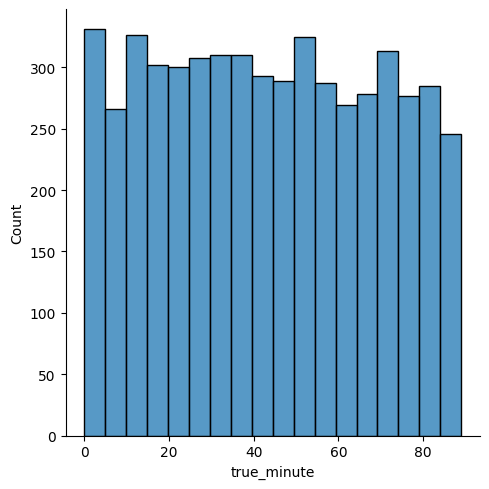

In [46]:
sns.displot(data=df, x='true_minute')
plt.show()